<a href="https://colab.research.google.com/github/RoshanMaharjan7/Concepts-and-Technologies-of-AI/blob/main/2408424_Roshan_Maharjan_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Roshan Maharjan\
Student ID: 2408424

#Necessary Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel


from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#Reading CSV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Concepts of AI/Final Assesment/Classification/updated_pollution_dataset.csv')

#Exploratory Data Analysis Statistical Interpretation and Visualizations.

In [ ]:
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [ ]:
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 5000
Number of columns: 10


In [ ]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [ ]:
print("Data types of all columns:")
print(df.dtypes)

Data types of all columns:
Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
df["Air Quality"].value_counts()

,count
Air Quality,
Good,2000
Moderate,1500
Poor,1000
Hazardous,500


###Checking for null values

In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [ ]:
df.drop_duplicates(inplace=True);

df.dropna(axis=0, how='any', inplace=True)

print(df.isnull().sum())
print(df.info())

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null 

##Summary

In [ ]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


<ipython-input-12-5a4c60ff6738>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Air Quality", data=df, palette="Blues")


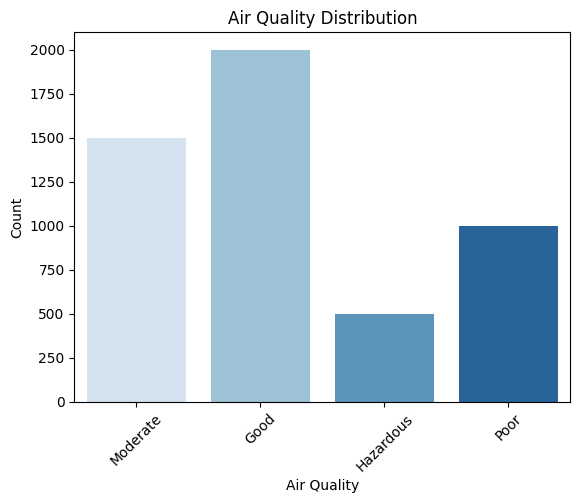

In [ ]:
air_quality_counts = df["Air Quality"].value_counts()

sns.countplot(x="Air Quality", data=df, palette="Blues")
plt.title("Air Quality Distribution")
plt.xlabel("Air Quality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##Visualization

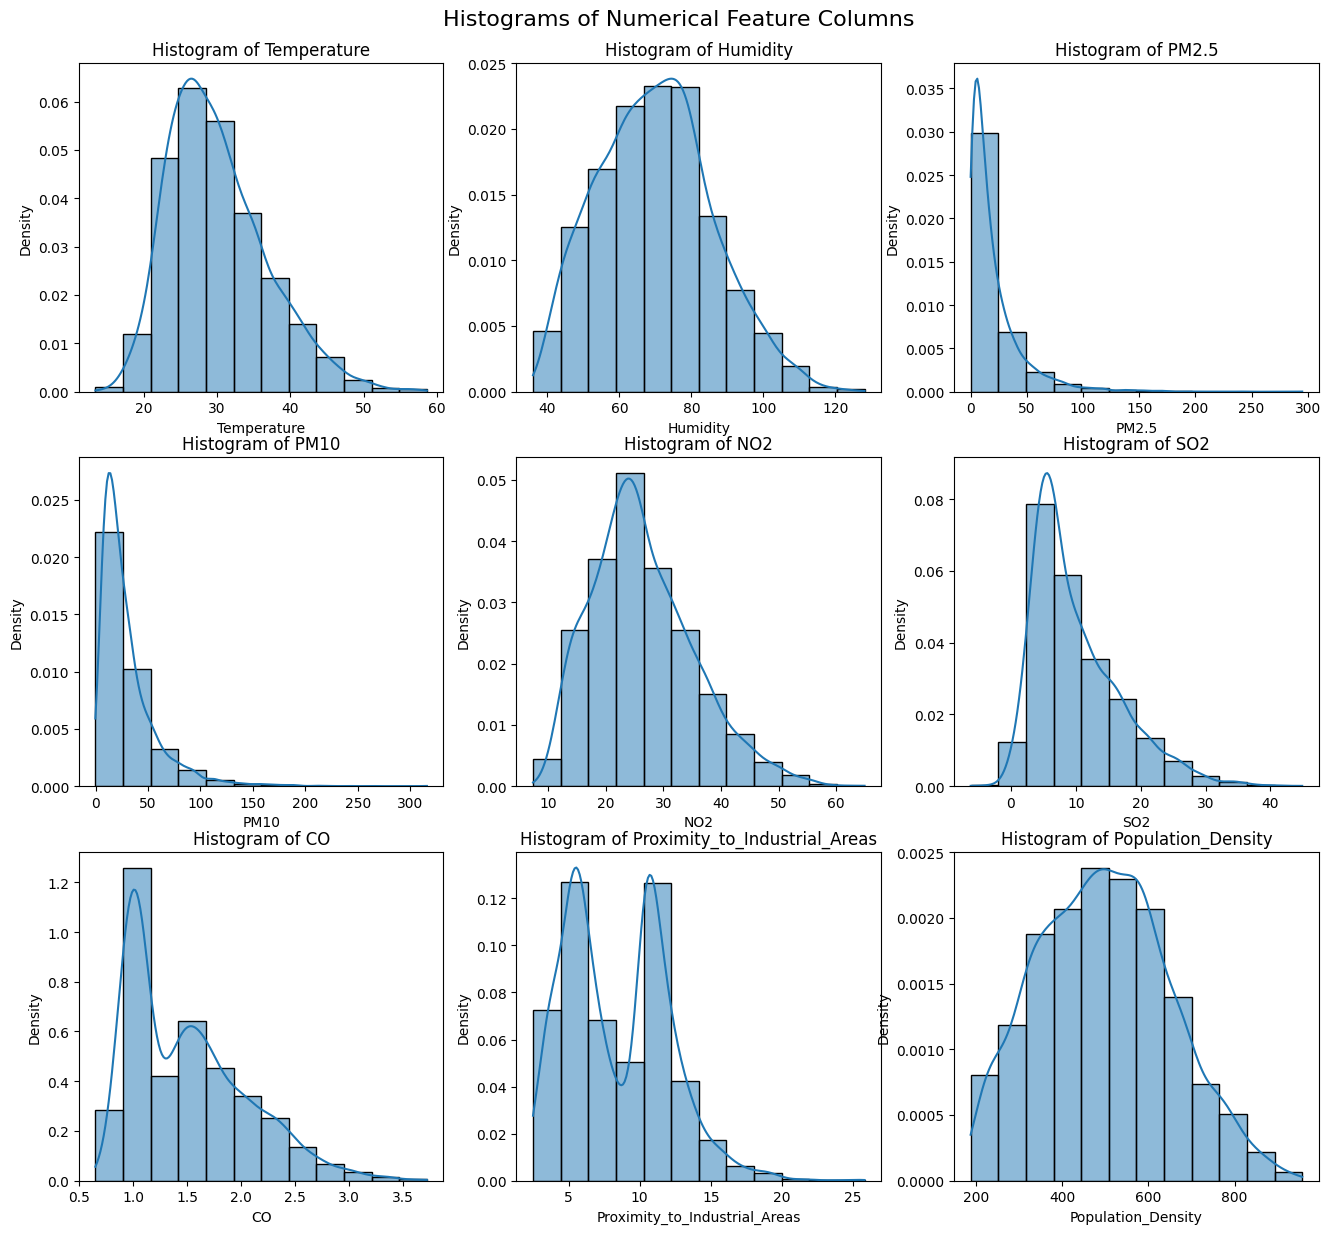

In [ ]:
plt.figure(figsize=(16, 18))

for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(len(df.select_dtypes(include=['number']).columns) // 3 + 1, 3, i+1)
    sns.histplot(df[column], kde=True, bins=12, edgecolor='black', stat='density')
    plt.title(f"Histogram of {column}")

plt.subplots_adjust(top=0.95)

plt.suptitle("Histograms of Numerical Feature Columns", fontsize=16)

plt.show()

In [ ]:
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        column_data = df[column].dropna()

        Q1 = column_data.quantile(0.25)
        Q3 = column_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
        outlier_counts[column] = len(outliers)

    return outlier_counts


outliers = count_outliers(df)
print(outliers)

{'Temperature': 72, 'Humidity': 19, 'PM2.5': 352, 'PM10': 324, 'NO2': 73, 'SO2': 124, 'CO': 45, 'Proximity_to_Industrial_Areas': 16, 'Population_Density': 7}


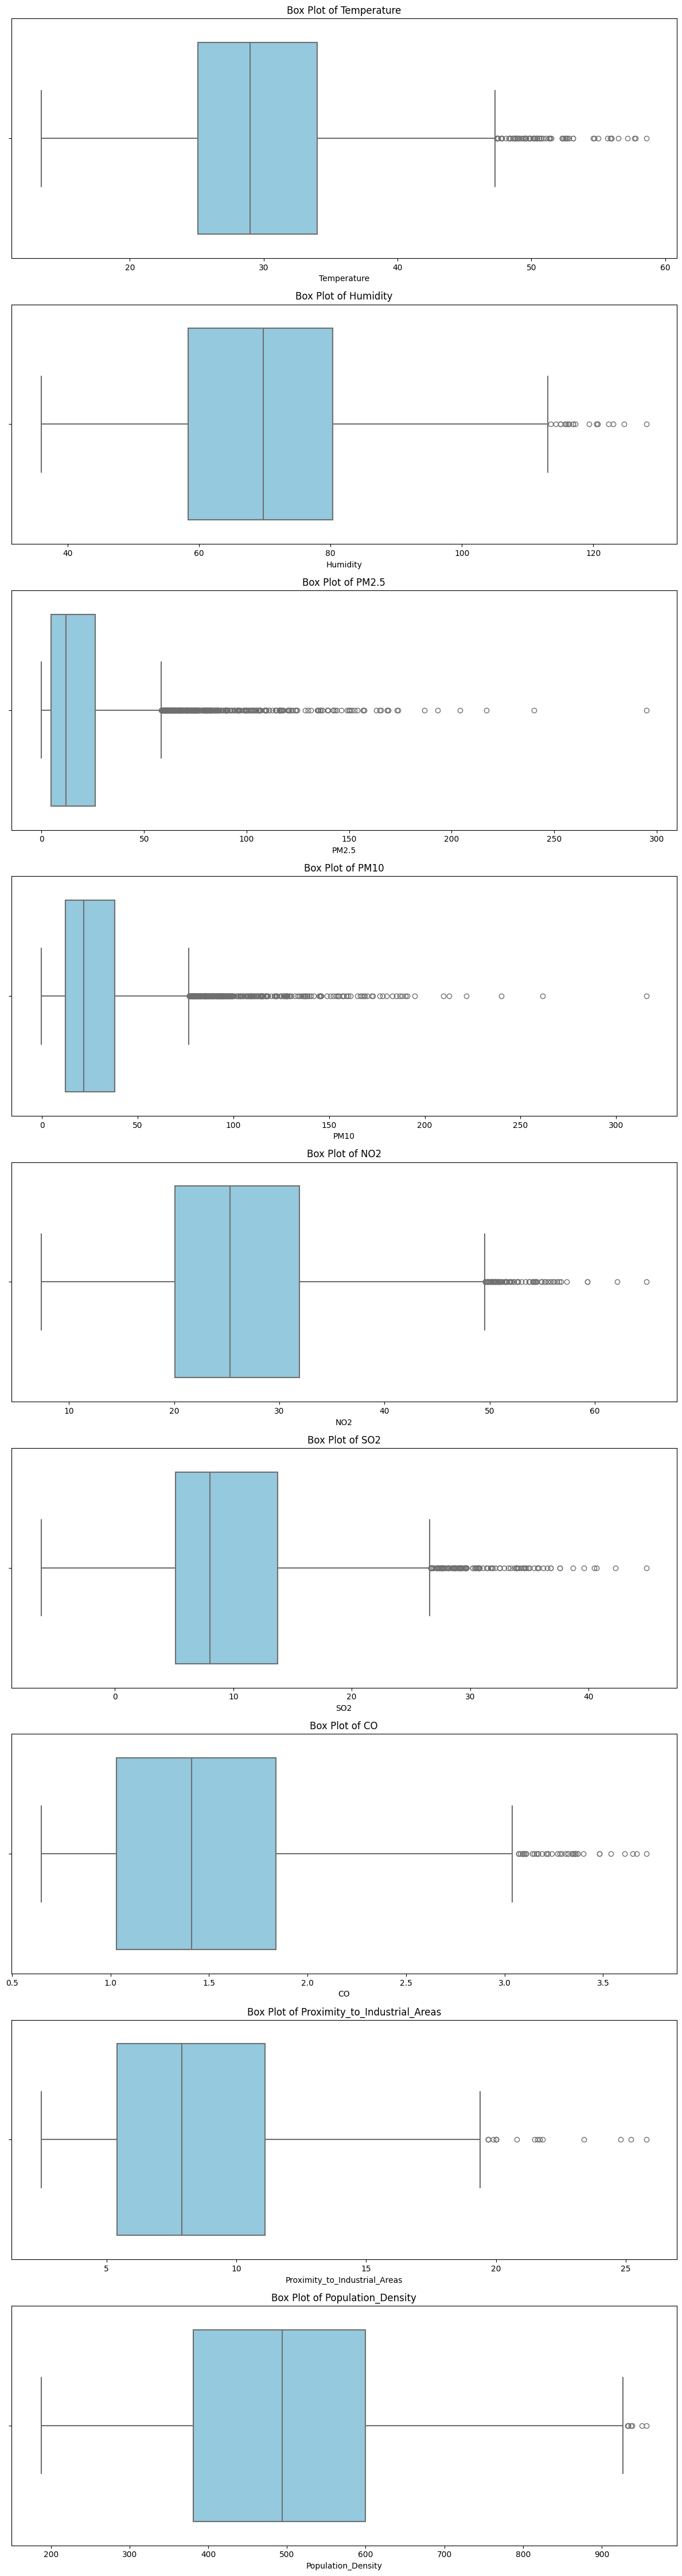

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns

num_columns = len(numerical_columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(12, num_columns * 5))

for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, x=column, ax=axes[i], color='skyblue', linewidth=1.5)
    axes[i].set_title(f"Box Plot of {column}")

plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers_iqr(df):
    df_filtered = df.copy()

    for column in df_filtered.select_dtypes(include=['number']).columns:
        Q1 = df_filtered[column].quantile(0.25)
        Q3 = df_filtered[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    return df_filtered

# Remove outliers
df = remove_outliers_iqr(df)
print(df.shape)

(4158, 10)


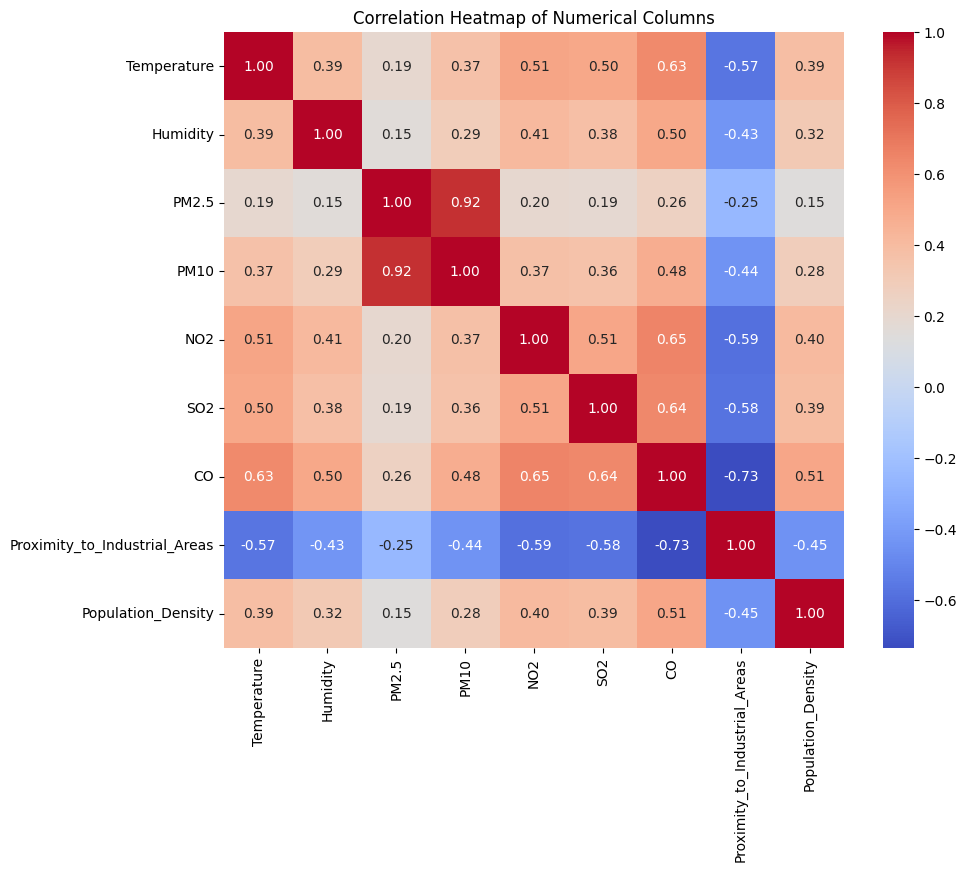

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=np.number).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()


#From Scratch

##Train Test Split

In [ ]:
X = df.drop('Air Quality', axis=1).values
y = df['Air Quality'].values

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
y_onehot

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Assertions to check the shape of X_train_scaled and X_test_scaled
assert X_train_scaled.shape == (X_train.shape[0], X_train.shape[1]), f"X_train_scaled shape mismatch: {X_train_scaled.shape}"
assert X_test_scaled.shape == (X_test.shape[0], X_test.shape[1]), f"X_test_scaled shape mismatch: {X_test_scaled.shape}"
print("Shape assertions passed!")

Shape assertions passed!


##Model Fitting

In [ ]:
def softmax(z):
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [ ]:
def loss_softmax(y_true, y_pred):
  return -np.sum(y_true * np.log(y_pred + 1e-10))

In [ ]:
def cost_softmax(X, y, W, b):
  n, d = X.shape
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  return -np.sum(y * np.log(y_pred + 1e-10)) / n

In [ ]:
def compute_gradient_softmax(X, y, W, b):
  n, d = X.shape
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  grad_W = np.dot(X.T, (y_pred - y)) / n
  grad_b = np.sum(y_pred - y, axis=0) / n
  return grad_W, grad_b

In [ ]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
  cost_history = []
  for i in range(n_iter):
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
    W -= alpha * grad_W
    b -= alpha * grad_b
    cost = cost_softmax(X, y, W, b)
    cost_history.append(cost)
    if show_cost and (i % 100 == 0 or i == n_iter - 1):
      print(f"Iteration {i}: Cost = {cost:.6f}")
  return W, b, cost_history

In [ ]:
def predict_softmax(X, W, b):
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  return np.argmax(y_pred, axis=1)

##Training of Model

In [ ]:
num_classes = y_train.shape[1]
num_features = X_train_scaled.shape[1]
W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)
alpha = 0.1
n_iter = 1000
print("\nTraining Softmax Regression Model:")
W, b, cost_history = gradient_descent_softmax(X_train_scaled, y_train, W, b, alpha, n_iter, show_cost=True)


Training Softmax Regression Model:
Iteration 0: Cost = 1.260115
Iteration 100: Cost = 0.402169
Iteration 200: Cost = 0.329164
Iteration 300: Cost = 0.292769
Iteration 400: Cost = 0.269516
Iteration 500: Cost = 0.252919
Iteration 600: Cost = 0.240289
Iteration 700: Cost = 0.230257
Iteration 800: Cost = 0.222036
Iteration 900: Cost = 0.215135
Iteration 999: Cost = 0.209284


##Prediction

Shape of y_train_pred: (3326,)
Shape of y_test_pred: (832,)
Shape of y_train_labels: (3326,)
Shape of y_test_labels: (832,)

Train Loss (Cost): 0.2093
Test Loss (Cost): 0.2183

Train Accuracy: 94.50%

Test Accuracy: 93.15%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       396
           1       0.00      0.00      0.00        18
           2       0.91      0.96      0.93       278
           3       0.83      0.81      0.82       140

    accuracy                           0.93       832
   macro avg       0.68      0.69      0.69       832
weighted avg       0.91      0.93      0.92       832

Confusion Matrix:
[[395   0   1   0]
 [  0   0   0  18]
 [  6   0 267   5]
 [  0   0  27 113]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


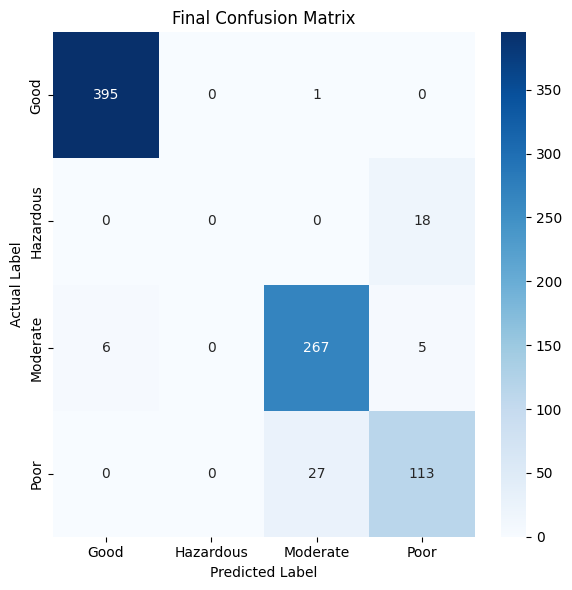

In [ ]:
# # Test model
y_train_pred = predict_softmax(X_train_scaled, W, b)
y_test_pred = predict_softmax(X_test_scaled, W, b)

# Convert one-hot encoded labels to class labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Check shapes of predictions and labels
print(f"Shape of y_train_pred: {y_train_pred.shape}")
print(f"Shape of y_test_pred: {y_test_pred.shape}")
print(f"Shape of y_train_labels: {y_train_labels.shape}")
print(f"Shape of y_test_labels: {y_test_labels.shape}")

# Evaluate train and test performance
train_cost = cost_softmax(X_train_scaled, y_train, W, b)
test_cost = cost_softmax(X_test_scaled, y_test, W, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")

# Calculate accuracy on train data
train_accuracy = np.mean(y_train_pred == y_train_labels) * 100
print(f"\nTrain Accuracy: {train_accuracy:.2f}%")

# Calculate accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test_labels) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_test_pred))

conf_matrix = confusion_matrix(y_test_labels, y_test_pred)


print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Final Confusion Matrix")
plt.tight_layout()
plt.show()



#Model 1 - LogisticRegression

Logistic Regression Evaluation:
Train Accuracy: 95.85%
Test Accuracy: 95.07%

Classification Report:
              precision    recall  f1-score   support

        Good       0.99      1.00      1.00       391
   Hazardous       0.77      0.50      0.61        20
    Moderate       0.95      0.95      0.95       286
        Poor       0.85      0.87      0.86       135

    accuracy                           0.95       832
   macro avg       0.89      0.83      0.85       832
weighted avg       0.95      0.95      0.95       832

Confusion Matrix:
[[391   0   0   0]
 [  0  10   0  10]
 [  3   0 273  10]
 [  0   3  15 117]]


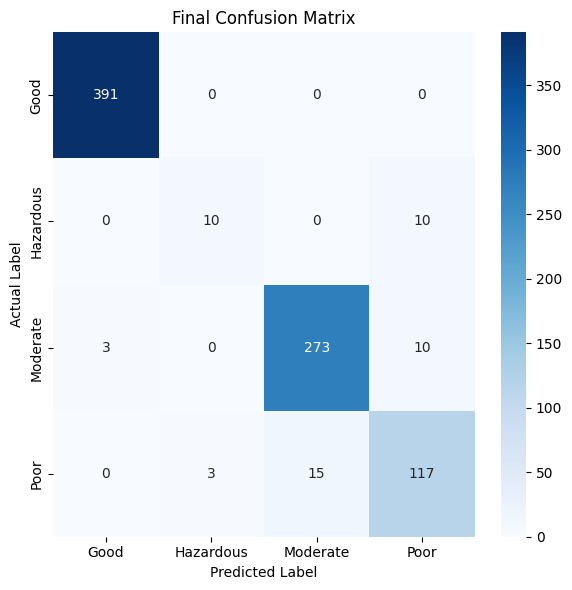

In [ ]:
X = df.drop('Air Quality', axis=1).values
y = df['Air Quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_model_log = LogisticRegression()

# Fit the model
clf_model_log.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_train = clf_model_log.predict(X_train_scaled)
y_pred_log = clf_model_log.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Evaluation:")
print(f"Train Accuracy: {(accuracy_score(y_train, y_pred_train) * 100):.2f}%")
print(f"Test Accuracy: {(accuracy_score(y_test, y_pred_log) * 100):.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)


print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Final Confusion Matrix")
plt.tight_layout()
plt.show()


#Model 2 - RandomForestClassifier

Random Forest Evaluation:
Train Accuracy: 100.00%
Test Accuracy: 96.27%

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       391
   Hazardous       1.00      0.45      0.62        20
    Moderate       0.96      0.97      0.97       286
        Poor       0.87      0.91      0.89       135

    accuracy                           0.96       832
   macro avg       0.96      0.83      0.87       832
weighted avg       0.96      0.96      0.96       832

Confusion Matrix:
[[391   0   0   0]
 [  0   9   0  11]
 [  1   0 278   7]
 [  0   0  12 123]]


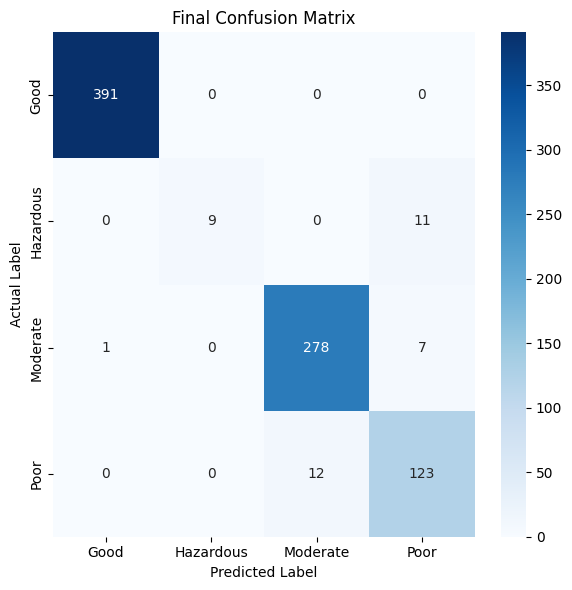

In [ ]:
# Random forest
clf_model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model_rf.fit(X_train_scaled, y_train)

y_pred_trian_rf = clf_model_rf.predict(X_train_scaled)
y_pred_rf = clf_model_rf.predict(X_test_scaled)

print("Random Forest Evaluation:")
print(f"Train Accuracy: {(accuracy_score(y_train, y_pred_trian_rf) * 100):.2f}%")
print(f"Test Accuracy: {(accuracy_score(y_test, y_pred_rf) * 100):.2f}%")

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Final Confusion Matrix")
plt.tight_layout()
plt.show()


#Model Comparison

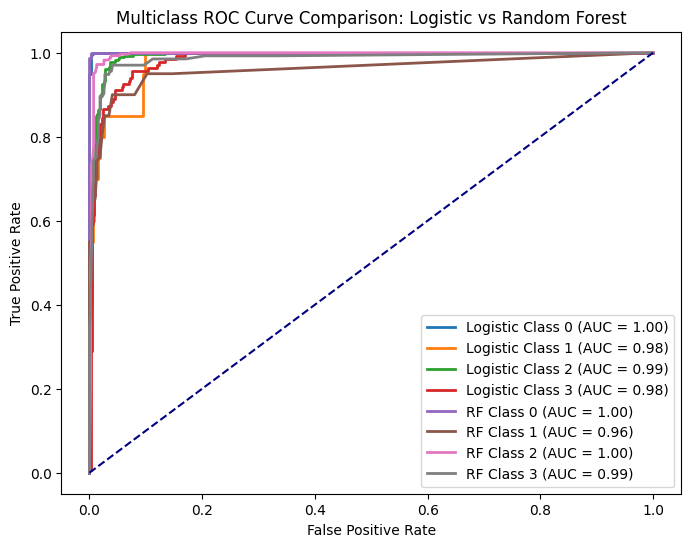

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=clf_model_log.classes_)
y_pred_log_prob = clf_model_log.predict_proba(X_test_scaled)
y_pred_rf_prob = clf_model_rf.predict_proba(X_test_scaled)

# Compute ROC for KNN (One-vs-Rest)
fpr_log, tpr_log, roc_auc_log = {}, {}, {}
for i in range(y_test_bin.shape[1]):
    fpr_log[i], tpr_log[i], _ = roc_curve(y_test_bin[:, i], y_pred_log_prob[:, i])
    roc_auc_log[i] = auc(fpr_log[i], tpr_log[i])

# Compute ROC for Random Forest (One-vs-Rest)
fpr_rf, tpr_rf, roc_auc_rf = {}, {}, {}
for i in range(y_test_bin.shape[1]):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_pred_rf_prob[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC Curves for each class
plt.figure(figsize=(8, 6))

# Plot log ROC curves for each class
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr_log[i], tpr_log[i], lw=2, label=f'Logistic Class {i} (AUC = {roc_auc_log[i]:.2f})')

# Plot Random Forest ROC curves for each class
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr_rf[i], tpr_rf[i], lw=2, label=f'RF Class {i} (AUC = {roc_auc_rf[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve Comparison: Logistic vs Random Forest')
plt.legend(loc="lower right")
plt.show()


#Hyper Parameter Tuning

##Model 1 - LogisticRegression

In [ ]:
clf_model_log = LogisticRegression()

log_reg_param_grid = [
    {
        'penalty': ['l2'],
        'C': np.logspace(-5, 2, 8),
        'solver': ['liblinear', 'newton-cg', 'lbfgs'],
       'max_iter': [5000],  # Increased max_iter
    },
    {
        'penalty': ['elasticnet'],
        'C': np.logspace(-5, 2, 8),
        'solver': ['saga'],
       'max_iter': [5000],
        'l1_ratio': [0.1, 0.5, 0.9],
    }
]

log_grid = RandomizedSearchCV(clf_model_log, log_reg_param_grid, cv=5, scoring='accuracy')
log_grid.fit(X_train_scaled, y_train)

print("Best hyperparameters found: ", log_grid.best_params_)

Best hyperparameters found:  {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 5000, 'l1_ratio': 0.9, 'C': 1.0}


Logistic Regression Evaluation:
Train Accuracy: 95.79%
Test Accuracy: 95.19%

Classification Report:
              precision    recall  f1-score   support

        Good       0.99      1.00      1.00       391
   Hazardous       0.79      0.55      0.65        20
    Moderate       0.94      0.96      0.95       286
        Poor       0.86      0.87      0.86       135

    accuracy                           0.95       832
   macro avg       0.90      0.84      0.86       832
weighted avg       0.95      0.95      0.95       832

Confusion Matrix:
[[390   0   1   0]
 [  0  11   0   9]
 [  2   0 274  10]
 [  0   3  15 117]]


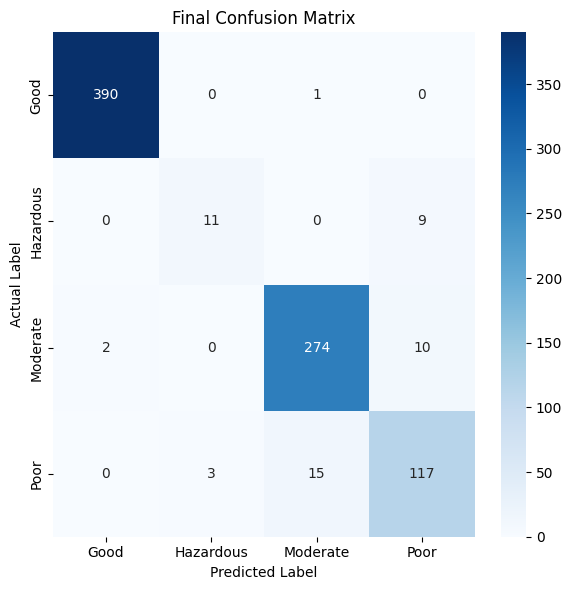

In [ ]:
clf_model_log_reg = LogisticRegression(
    solver=log_grid.best_params_['solver'],
    penalty=log_grid.best_params_['penalty'],
    max_iter=log_grid.best_params_['max_iter'],
    C=log_grid.best_params_['C'],
    l1_ratio=log_grid.best_params_['l1_ratio']
)

clf_model_log_reg.fit(X_train_scaled, y_train)

y_pred_train_log_reg = clf_model_log_reg.predict(X_train_scaled)
y_pred_log_reg = clf_model_log_reg.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Evaluation:")
print(f"Train Accuracy: {(accuracy_score(y_train, y_pred_train_log_reg) * 100):.2f}%")
print(f"Test Accuracy: {(accuracy_score(y_test, y_pred_log_reg) * 100):.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("Confusion Matrix:")
print(conf_matrix_log_reg)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Final Confusion Matrix")
plt.tight_layout()
plt.show()


##Model 2 - RandomForestClassifier

In [ ]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_scaled, y_train)

print("Best Random Forest Parameters:", rf_grid.best_params_)

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


Random Forest Evaluation:
Train Accuracy: 98.80%
Test Accuracy: 96.03%
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       391
   Hazardous       1.00      0.40      0.57        20
    Moderate       0.95      0.98      0.96       286
        Poor       0.88      0.89      0.88       135

    accuracy                           0.96       832
   macro avg       0.96      0.82      0.85       832
weighted avg       0.96      0.96      0.96       832

Confusion Matrix:
[[391   0   0   0]
 [  0   8   0  12]
 [  1   0 280   5]
 [  0   0  15 120]]


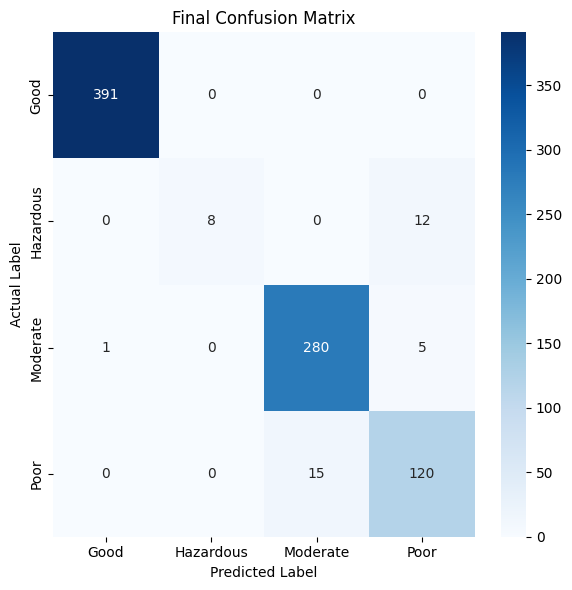

In [ ]:
clf_model_rf = RandomForestClassifier(max_depth=rf_grid.best_params_['max_depth'], min_samples_split=rf_grid.best_params_['min_samples_split'], random_state=42, n_estimators=rf_grid.best_params_['n_estimators'])
clf_model_rf.fit(X_train_scaled, y_train)

y_pred_train_rf = clf_model_rf.predict(X_train_scaled)
y_pred_rf = clf_model_rf.predict(X_test_scaled)

print("Random Forest Evaluation:")
print(f"Train Accuracy: {(accuracy_score(y_train, y_pred_train_rf) * 100):.2f}%")
print(f"Test Accuracy: {(accuracy_score(y_test, y_pred_rf) * 100):.2f}%")

print(classification_report(y_test, y_pred_rf))

conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Final Confusion Matrix")
plt.tight_layout()
plt.show()


#Feature Selection

##Model 1 - LogisticRegression

In [ ]:
log_reg = LogisticRegression(solver='liblinear', penalty='l1')

# Fit the model
log_reg.fit(X_train_scaled, y_train)

# Select features based on coefficients
sfm = SelectFromModel(log_reg, threshold="mean", max_features=5)
sfm.fit(X_train_scaled, y_train)

# Get the selected features (boolean mask)
selected_features_sfm = sfm.get_support()

X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

selected_features_log = X.columns[selected_features_sfm]
print("Selected Features:")
print(selected_features_log)

Selected Features:
Index(['PM10', 'CO', 'Proximity_to_Industrial_Areas'], dtype='object')


##Model 2 - RandomForestClassifier

In [ ]:

X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

clf_model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model_rf.fit(X_train_scaled, y_train)

feature_importances = pd.Series(clf_model_rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print("Feature importances:")
print(feature_importances)

top_features = feature_importances.head(8)
print("\nTop 8 features:")
print(top_features)

Feature importances:
CO                               0.350635
Proximity_to_Industrial_Areas    0.326093
SO2                              0.082379
Temperature                      0.073932
NO2                              0.071630
Humidity                         0.034267
Population_Density               0.032692
PM10                             0.018118
PM2.5                            0.010254
dtype: float64

Top 8 features:
CO                               0.350635
Proximity_to_Industrial_Areas    0.326093
SO2                              0.082379
Temperature                      0.073932
NO2                              0.071630
Humidity                         0.034267
Population_Density               0.032692
PM10                             0.018118
dtype: float64


#Final Model - RandomForestClassifier

Final Random Forest Evaluation:
Train Accuracy: 98.83%
Test Accuracy: 96.15%
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       391
   Hazardous       1.00      0.45      0.62        20
    Moderate       0.95      0.98      0.96       286
        Poor       0.88      0.90      0.89       135

    accuracy                           0.96       832
   macro avg       0.96      0.83      0.87       832
weighted avg       0.96      0.96      0.96       832

Final Confusion Matrix:
[[391   0   0   0]
 [  0   9   0  11]
 [  1   0 279   6]
 [  0   0  14 121]]


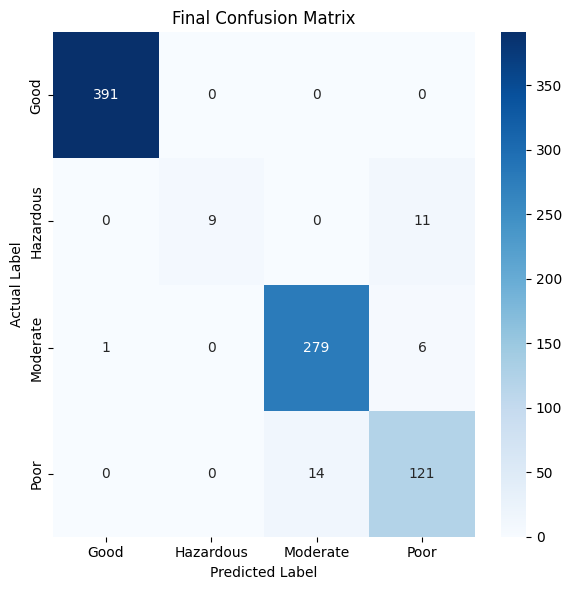

In [ ]:
top_feature_names = feature_importances.head(8).index

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_top_features = X_train_scaled_df[top_feature_names]
X_test_top_features = X_test_scaled_df[top_feature_names]

best_params = rf_grid.best_params_

final_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

final_rf_model.fit(X_train_top_features, y_train)

y_pred_train_final_rf = final_rf_model.predict(X_train_top_features)
y_pred_final_rf = final_rf_model.predict(X_test_top_features)

print("Final Random Forest Evaluation:")
print(f"Train Accuracy: {(accuracy_score(y_train, y_pred_train_final_rf) * 100):.2f}%")
print(f"Test Accuracy: {(accuracy_score(y_test, y_pred_final_rf) * 100):.2f}%")

print(classification_report(y_test, y_pred_final_rf))

conf_matrix_final_rf = confusion_matrix(y_test, y_pred_final_rf)

print("Final Confusion Matrix:")
print(conf_matrix_final_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_final_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Final Confusion Matrix")
plt.tight_layout()
plt.show()
